# FOREST FIRES PREDICTOR

In [1]:
import pandas as pd

In [2]:
ff=pd.read_csv("forestfiresdata.csv")

In [3]:
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [4]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      513 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [5]:
ff['wind'].value_counts()

3.1    53
2.2    53
4.0    51
4.9    48
2.7    44
5.4    41
4.5    41
3.6    40
1.8    31
5.8    24
6.3    19
1.3    14
7.6    14
0.9    13
8.5     8
6.7     8
8.0     5
7.2     4
9.4     4
8.9     1
0.4     1
Name: wind, dtype: int64

In [6]:
ff.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,513.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.296296,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.318304,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

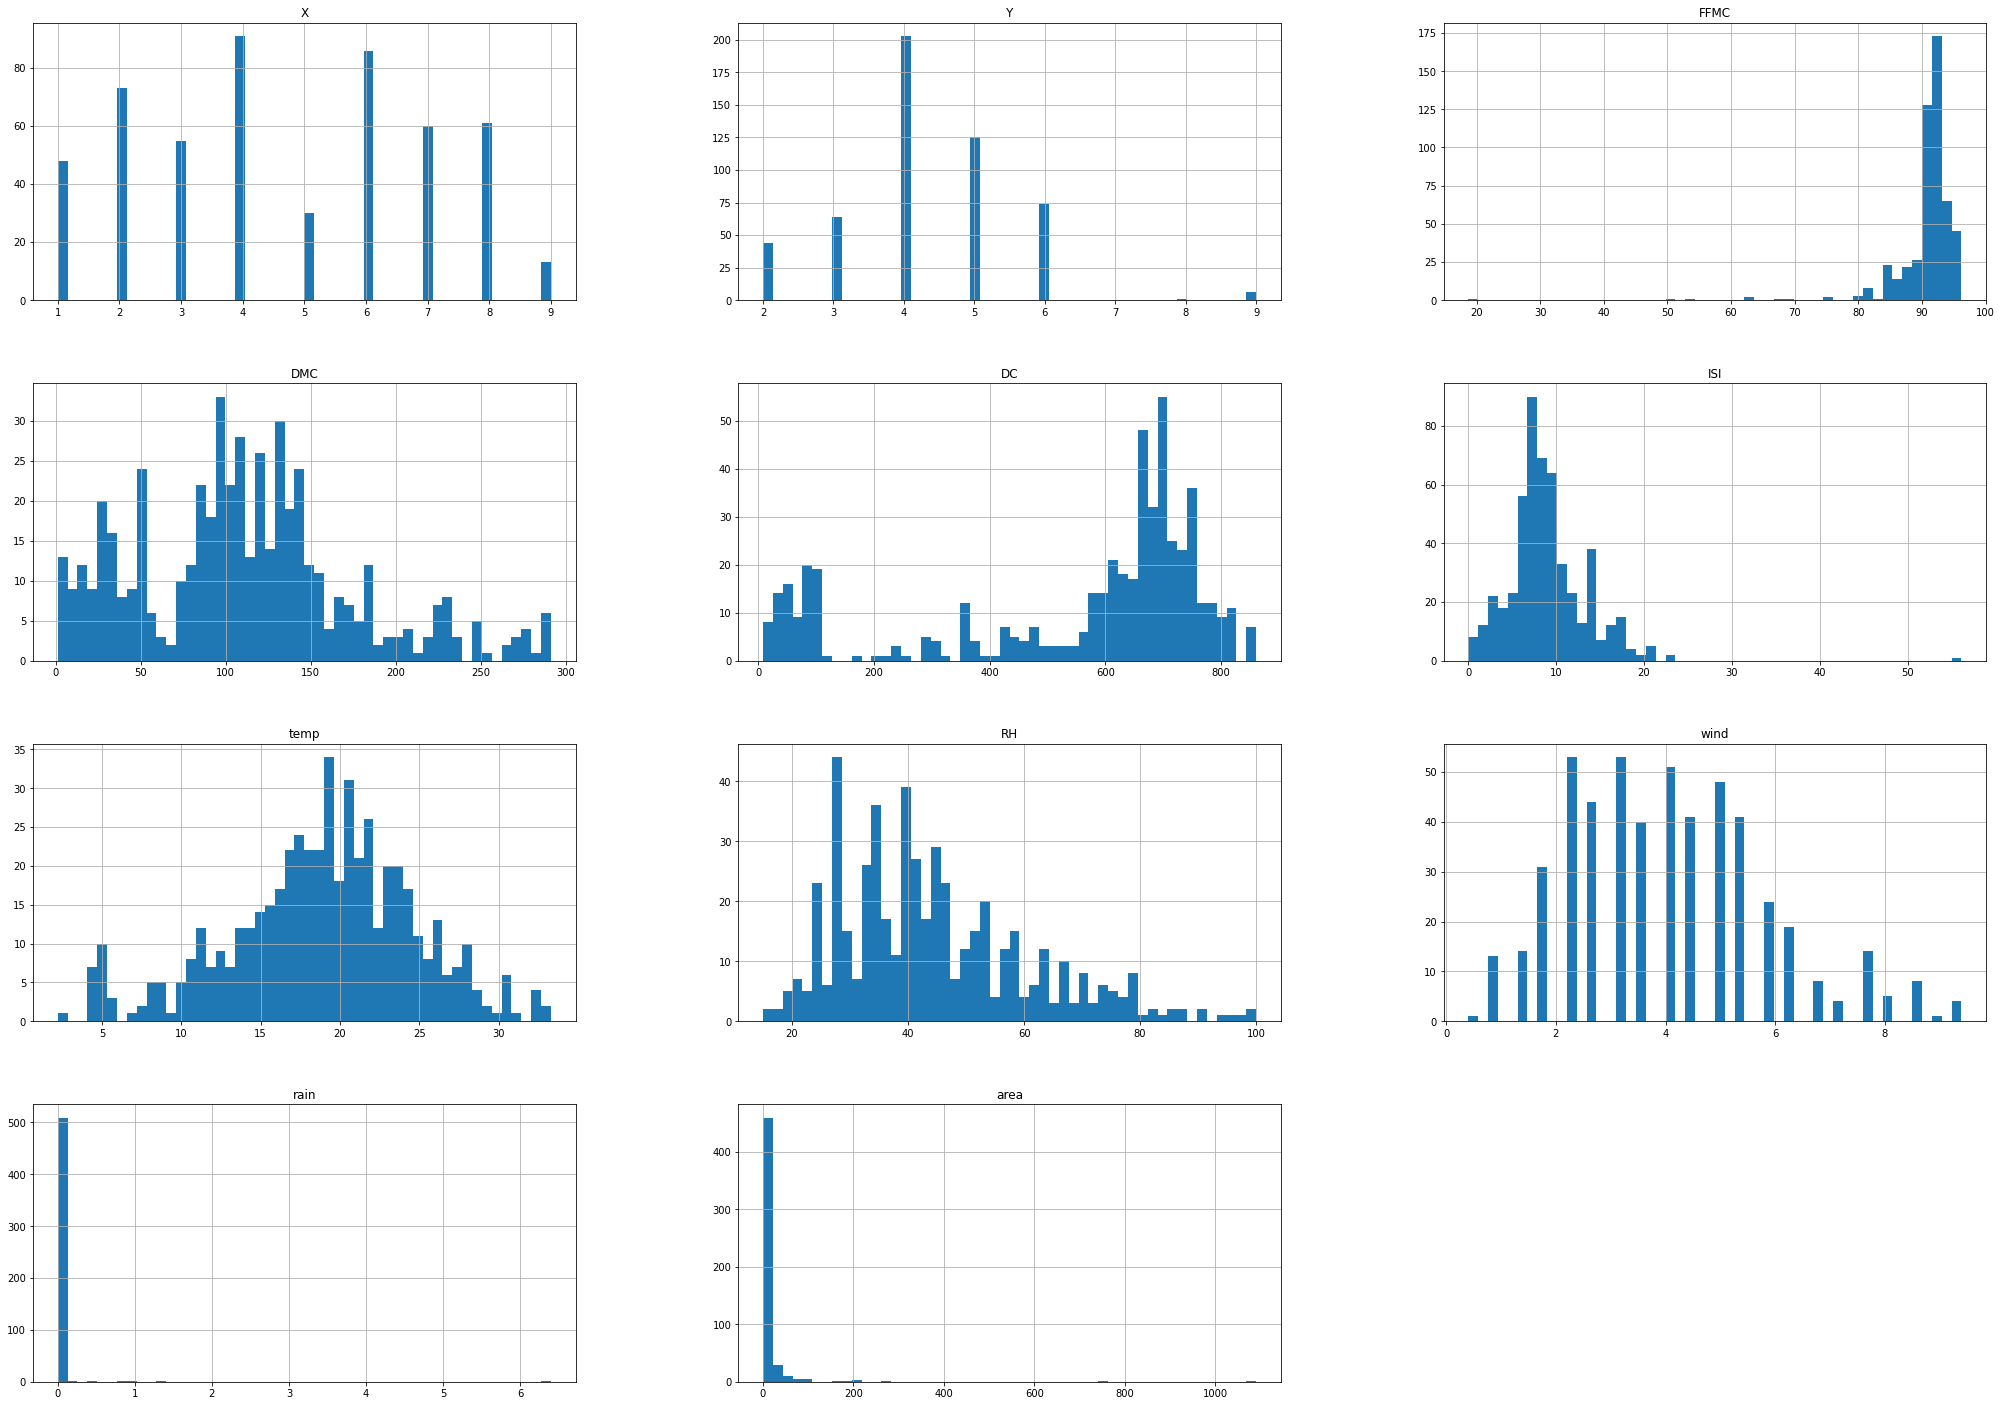

In [9]:
ff.hist(bins=50, figsize=(35,25))

## Train- Test Data Splitting

In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(ff,test_size=0.25,random_state=42)
print(f"The number of training values:{len(train_set)}\nThe number of test values:{len(test_set)}\n")

The number of training values:387
The number of test values:130



In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
s=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)
for train_index,test_index in s.split(ff,ff['day']):
    strat_train_values=ff.loc[train_index]
    strat_test_values=ff.loc[test_index]

In [12]:
strat_test_values.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,127.000000,130.000000,130.000000,130.000000
mean,4.515385,4.315385,90.665385,114.281538,534.080769,8.670000,18.353846,45.669291,4.209231,0.007692,6.677231
std,2.316890,1.113933,4.273276,69.815497,263.522651,3.840737,6.132328,16.287133,1.999087,0.072192,14.100628
min,1.000000,2.000000,63.500000,3.600000,15.300000,0.800000,4.600000,19.000000,0.400000,0.000000,0.000000
25%,2.000000,4.000000,90.200000,52.200000,376.750000,6.350000,15.200000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.650000,111.200000,647.100000,8.200000,18.500000,43.000000,4.000000,0.000000,1.350000
75%,6.000000,5.000000,92.775000,151.775000,715.100000,10.200000,21.675000,54.500000,5.400000,0.000000,6.535000
max,8.000000,6.000000,96.200000,290.000000,855.300000,20.000000,33.100000,99.000000,9.400000,0.800000,86.450000


In [13]:
strat_test_values['wind'].value_counts()

2.2    14
5.4    14
1.8    12
2.7    12
3.1    11
4.9    10
3.6    10
4.0    10
6.3     6
4.5     5
5.8     4
7.6     4
8.5     4
8.0     4
6.7     3
7.2     2
1.3     2
0.4     1
0.9     1
9.4     1
Name: wind, dtype: int64

In [14]:
strat_train_values['wind'].value_counts()

3.1    42
4.0    41
2.2    39
4.9    38
4.5    36
2.7    32
3.6    30
5.4    27
5.8    20
1.8    19
6.3    13
1.3    12
0.9    12
7.6    10
6.7     5
8.5     4
9.4     3
7.2     2
8.9     1
8.0     1
Name: wind, dtype: int64

In [15]:
ff=strat_train_values.copy()

## Drawing correlations

In [16]:
corr_matrix=ff.corr()

In [17]:
corr_matrix['area'].sort_values(ascending=False)

area    1.000000
temp    0.105979
DMC     0.083088
X       0.069329
DC      0.055794
Y       0.043806
FFMC    0.040574
wind    0.017405
ISI     0.008133
rain   -0.008348
RH     -0.077761
Name: area, dtype: float64

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

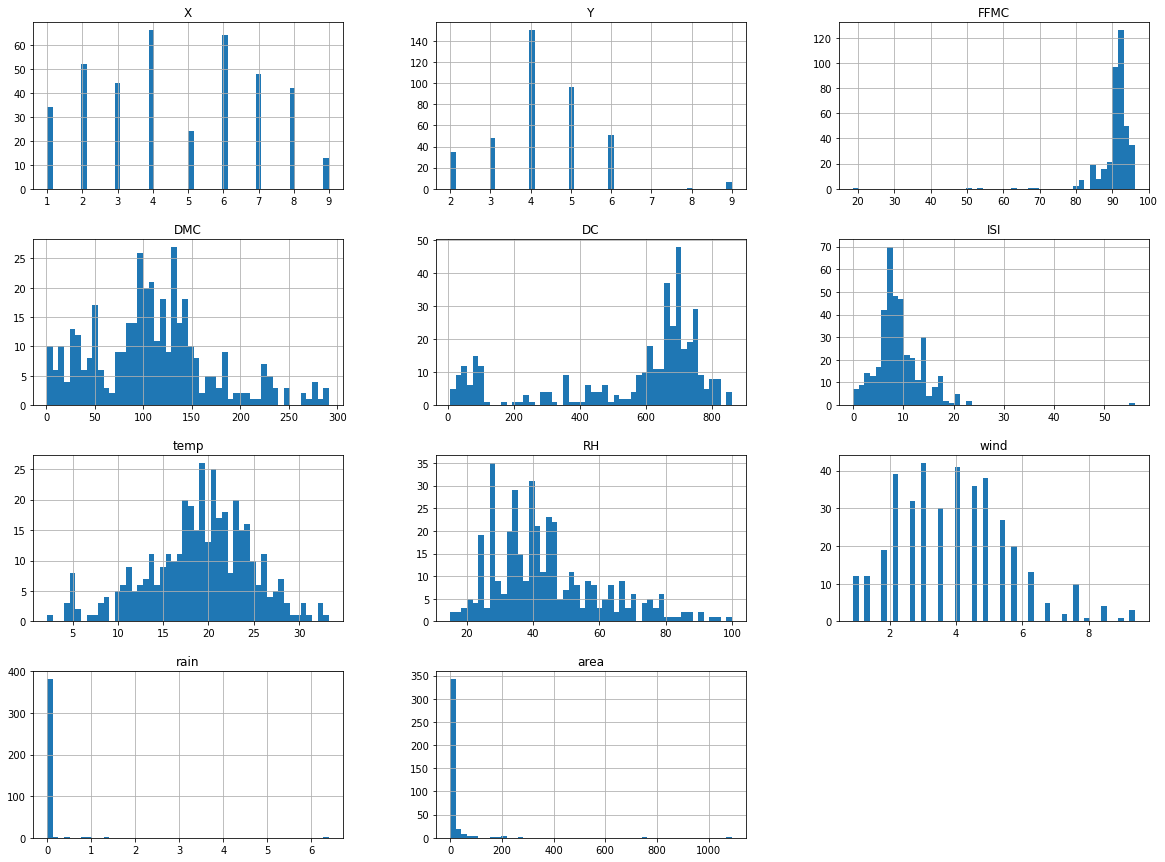

In [18]:
ff.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='temp', ylabel='area'>,
        <AxesSubplot:xlabel='RH', ylabel='area'>,
        <AxesSubplot:xlabel='rain', ylabel='area'>],
       [<AxesSubplot:xlabel='area', ylabel='temp'>,
        <AxesSubplot:xlabel='temp', ylabel='temp'>,
        <AxesSubplot:xlabel='RH', ylabel='temp'>,
        <AxesSubplot:xlabel='rain', ylabel='temp'>],
       [<AxesSubplot:xlabel='area', ylabel='RH'>,
        <AxesSubplot:xlabel='temp', ylabel='RH'>,
        <AxesSubplot:xlabel='RH', ylabel='RH'>,
        <AxesSubplot:xlabel='rain', ylabel='RH'>],
       [<AxesSubplot:xlabel='area', ylabel='rain'>,
        <AxesSubplot:xlabel='temp', ylabel='rain'>,
        <AxesSubplot:xlabel='RH', ylabel='rain'>,
        <AxesSubplot:xlabel='rain', ylabel='rain'>]], dtype=object)

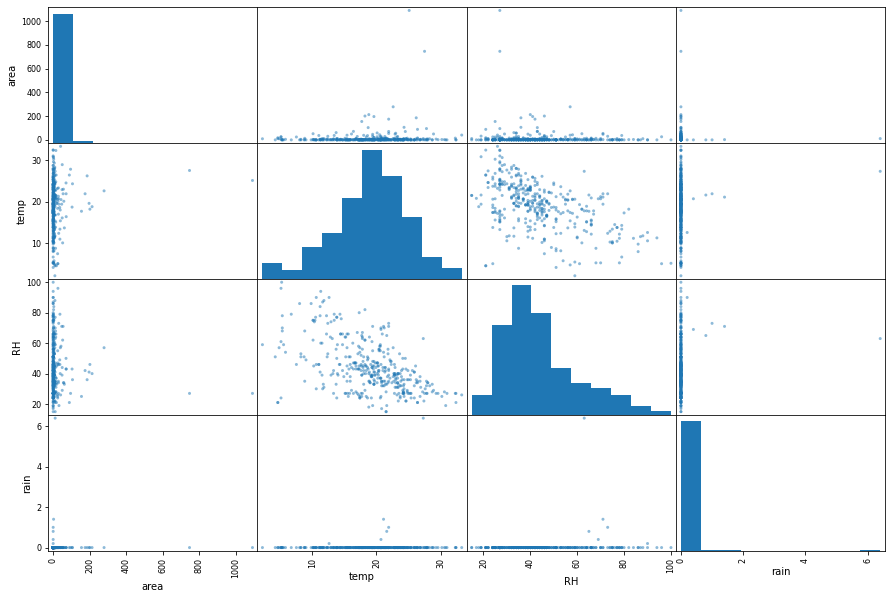

In [19]:
from pandas.plotting import scatter_matrix
att=["area","temp","RH","rain"]
scatter_matrix(ff[att],figsize=(15,10))

<AxesSubplot:xlabel='RH', ylabel='temp'>

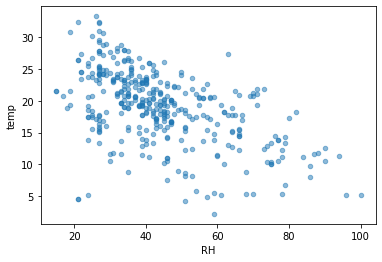

In [20]:
ff.plot(kind="scatter",x="RH",y="temp",alpha=0.5)

In [21]:
ff=strat_train_values.drop("area", axis=1)
ff_labels=strat_train_values["area"].copy()

## Dealing with Missing Attributes

In [22]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 89 to 347
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       387 non-null    int64  
 1   Y       387 non-null    int64  
 2   month   387 non-null    object 
 3   day     387 non-null    object 
 4   FFMC    387 non-null    float64
 5   DMC     387 non-null    float64
 6   DC      387 non-null    float64
 7   ISI     387 non-null    float64
 8   temp    387 non-null    float64
 9   RH      386 non-null    float64
 10  wind    387 non-null    float64
 11  rain    387 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 39.3+ KB


In [23]:
ff.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,386.000000,387.000000,387.000000
mean,4.720930,4.294574,90.637726,109.727132,552.595607,9.139793,19.068992,43.844560,3.953230,0.026357
std,2.313433,1.267794,5.884825,62.042448,242.831679,4.775436,5.689971,16.324364,1.714358,0.339503
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000
25%,3.000000,4.000000,90.300000,70.250000,446.550000,6.500000,15.750000,32.250000,2.700000,0.000000
50%,4.000000,4.000000,91.600000,108.000000,665.600000,8.400000,19.600000,41.000000,4.000000,0.000000
75%,7.000000,5.000000,92.900000,141.150000,711.450000,11.300000,23.000000,51.000000,4.900000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [24]:
median=ff['RH'].median()

In [25]:
median

41.0

In [26]:
ff["RH"].fillna(median)

89     25.0
222    46.0
232    43.0
227    34.0
152    43.0
       ... 
395    62.0
22     44.0
488    71.0
334    51.0
347    75.0
Name: RH, Length: 387, dtype: float64

In [27]:
ff.shape

(387, 12)

In [28]:
ff.drop("day",axis=1,inplace=True)

In [29]:
ff.drop("month",axis=1,inplace=True)

In [30]:
ff.shape

(387, 10)

In [31]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
imp.fit(ff)

SimpleImputer(strategy='median')

In [32]:
imp.statistics_

array([  4. ,   4. ,  91.6, 108. , 665.6,   8.4,  19.6,  41. ,   4. ,
         0. ])

In [33]:
x=imp.transform(ff)

In [34]:
new_ff=pd.DataFrame(x,columns=ff.columns)

In [35]:
new_ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       387 non-null    float64
 1   Y       387 non-null    float64
 2   FFMC    387 non-null    float64
 3   DMC     387 non-null    float64
 4   DC      387 non-null    float64
 5   ISI     387 non-null    float64
 6   temp    387 non-null    float64
 7   RH      387 non-null    float64
 8   wind    387 non-null    float64
 9   rain    387 non-null    float64
dtypes: float64(10)
memory usage: 30.4 KB


In [36]:
new_ff.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,4.720930,4.294574,90.637726,109.727132,552.595607,9.139793,19.068992,43.837209,3.953230,0.026357
std,2.313433,1.267794,5.884825,62.042448,242.831679,4.775436,5.689971,16.303846,1.714358,0.339503
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000
25%,3.000000,4.000000,90.300000,70.250000,446.550000,6.500000,15.750000,32.500000,2.700000,0.000000
50%,4.000000,4.000000,91.600000,108.000000,665.600000,8.400000,19.600000,41.000000,4.000000,0.000000
75%,7.000000,5.000000,92.900000,141.150000,711.450000,11.300000,23.000000,51.000000,4.900000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


## Designing a Pipeline


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imp',SimpleImputer(strategy='median')),('std_sc',StandardScaler())])


In [38]:
ff_new_tr=my_pipeline.fit_transform(ff)

In [39]:
ff_new_tr

array([[ 0.55360401,  0.55714054,  0.18074438, ..., -1.15688003,
         0.55297402, -0.07773343],
       [-0.31203135, -1.02244472, -0.51686473, ...,  0.13282697,
         1.07863136, -0.07773343],
       [ 0.55360401, -0.23265209,  0.06164038, ..., -0.05141689,
        -0.73196615, -0.07773343],
       ...,
       [-0.31203135, -0.23265209,  0.7592495 , ...,  1.66819244,
         2.12994605, -0.07773343],
       [-1.1776667 , -1.02244472,  0.16372952, ...,  0.43990006,
         0.84500587, -0.07773343],
       [ 0.12078633, -0.23265209,  0.2488038 , ...,  1.91385092,
        -0.20630881, -0.07773343]])

## Appropriate Model Selection for Wildlife Conservation Department

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#model=SVC()
#model=LogisticRegression()
#model=RandomForestRegressor()
#model=DecisionTreeRegressor()
model=LinearRegression()
model.fit(ff_new_tr,ff_labels)


LinearRegression()

In [46]:
initial_data=ff.iloc[:5]

In [47]:
initial_labels=ff_labels.iloc[:5]

In [48]:
final_data=my_pipeline.transform(initial_data)

In [49]:
model.predict(final_data)

array([18.34100436,  6.88203956, 18.6416919 , 23.58124251,  8.39109902])

In [50]:
list(initial_labels)

[0.0, 36.85, 103.39, 58.3, 1.43]

## Model Assessment

In [51]:
from sklearn.metrics import mean_squared_error
import numpy as np
ff_predictions=model.predict(ff_new_tr)
mse=mean_squared_error(ff_labels,ff_predictions)
rmse=np.sqrt(mse)


In [52]:
rmse

72.00761174539458

## Cross Validation

In [53]:
import numpy as np
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(model,ff_new_tr,ff_labels,scoring="neg_mean_squared_error",cv=10)
rmse=np.sqrt(-cvs)


In [54]:
rmse

array([ 43.52635925, 119.66887456,  18.12539113,  26.76700311,
        15.04606725,  32.1190454 ,  20.87096167,  43.98960078,
        20.28581789, 181.18792961])

In [55]:
def print_scores(cvs):
    print("CVS:",cvs)
    print("Mean:",cvs.mean())
    print("Standard Deviation:",cvs.std())

In [56]:
print_scores(rmse)

CVS: [ 43.52635925 119.66887456  18.12539113  26.76700311  15.04606725
  32.1190454   20.87096167  43.98960078  20.28581789 181.18792961]
Mean: 52.15870506545322
Standard Deviation: 51.888495915767855


In [57]:
from joblib import dump,load
dump(model,'Forest_Fires.joblib')

['Forest_Fires.joblib']

## Model Implementation on Test Data

In [58]:
test_data=strat_test_values.drop("day",axis=1,inplace=True)

In [59]:
test_data=strat_test_values.drop("month",axis=1,inplace=True)

In [60]:
test_data=strat_test_values.drop("area",axis=1)
test_labels=strat_test_values["area"].copy()
final_test_data=my_pipeline.transform(test_data)
final_predictions=model.predict(final_test_data)
final_rmse=np.sqrt(mean_squared_error(final_predictions,test_labels))

In [61]:
final_rmse

18.416176886634254

In [62]:
final_data[0]

array([ 0.55360401,  0.55714054,  0.18074438, -1.19309978, -1.94540658,
       -0.28092257, -0.29370145, -1.15688003,  0.55297402, -0.07773343])